<a href="https://colab.research.google.com/github/StacyChebet/Netflix-EDA/blob/master/Netflix_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

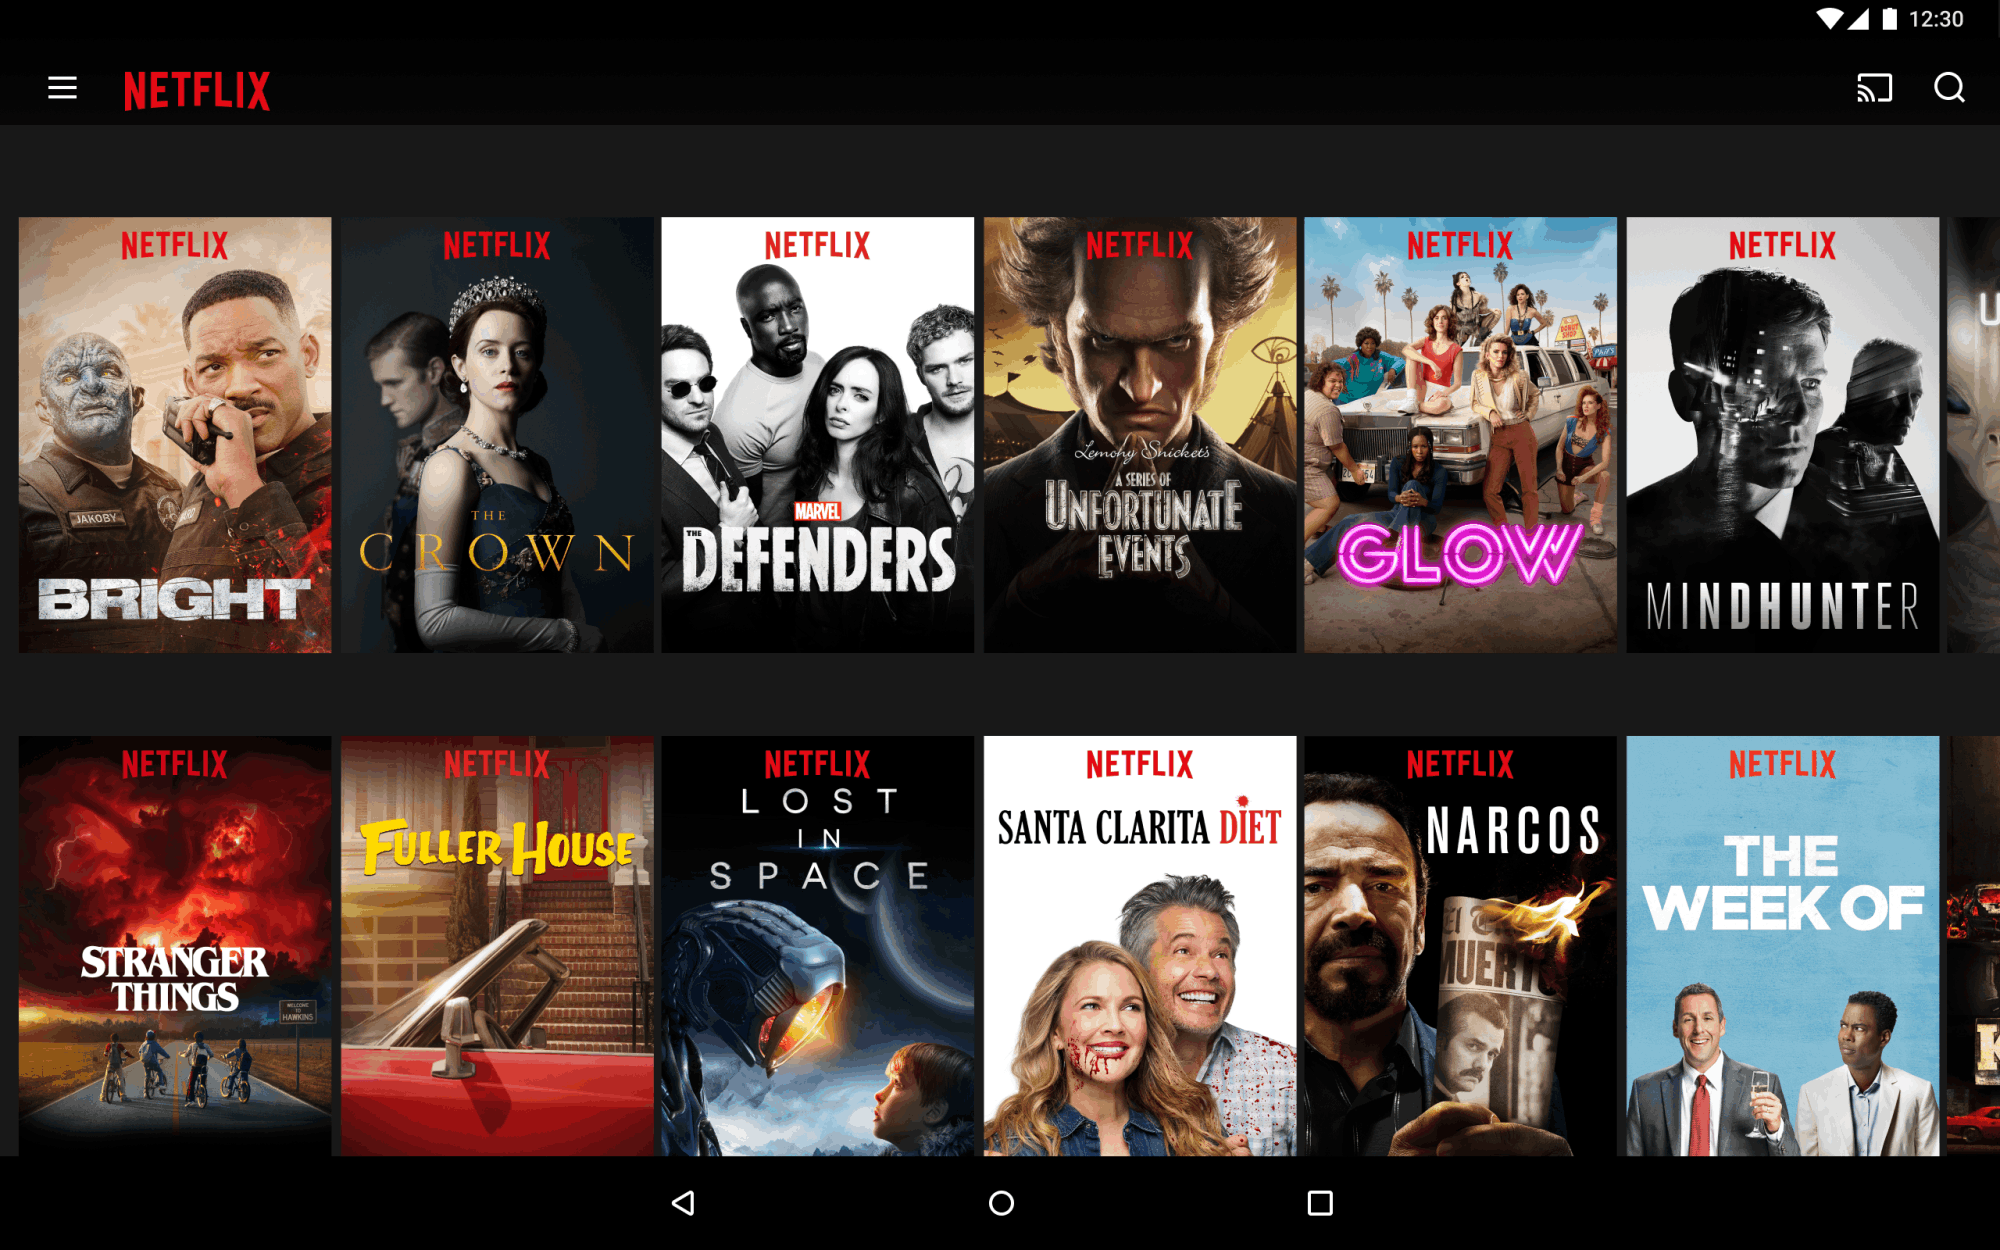

# **📖 What This Notebook is About**
In this notebook, I'll be performing **Exploratory Data Analysis (EDA)** on the Netflix dataset to uncover trends, patterns and insights.<br>
Expect to see visualizations of content distribution, country contributions, release trends, and more!<br>
We'll dive deep into:
- What types of content are most popular on Netflix?
- Which countries dominate the Netflix catalog?
- How does content vary across genres and ratings?
- Fun visualizations showing content trends over time!

By the end, you'll have a clear picture of what makes Netflix's 2021 library tick, through data, of course! 🍿📈



# **📊 Dataset Overview**
This dataset provides a comprehensive list of Netflix titles as of 2021, including both movies and TV shows. It containts various columns such as:
- `type` - Movie or TV Show
- `title` - The name of the content
- `director` & `cast` - The creative minds behind and infront of the camera
- `country` - Where the content was produced
- `date_added` & `release_year` - When it was added to Netflix and when it was released
- `rating` - Netflix's rating (is it kid-friendly or more mature?)
- `duration` - The length of the movie or number of seasons for TV Shows
- `listed_in` - Genre categories
- `description` - A brief summary of the content

# **Loading Libraries and Data** <br>
Libraries used: <br>
**Pandas:** For data manipulation <br>
**Numpy:** For numerical operations <br>
**Seaborn:** For data visualization

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting visualization styles
sns.set(style="whitegrid")

#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

#Changing directory
%cd /content/drive/My Drive/Colab Notebooks/Data Analytics - IBT/Netflix

#Loading the dataset
file_path = "netflix_titles_2021.csv"
df = pd.read_csv(file_path)

#Displaying the first few rows of the dataset
df.head()

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Data Analytics - IBT/Netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#**Initial Data Exploration**


In [ ]:
#Checking the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

#Displaying the data types of each column
print("\n Data types of each column:")
print(df.dtypes)

#Getting a summary of the dataset using descriptive statistics
print("\nSummary of the dataset:")
print(df.describe().T)

The dataset contains 8807 rows and 12 columns.

 Data types of each column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Summary of the dataset:
               count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  
release_year  2021.0  


#**Summary Findings**
- **Oldest Title:** The earliest title on Netflix dates all the way back to **1925**
- **Newest Title:** The most recent titles, at the time, were from **2021**; which is when the dataset was compiled.
- **Average Release Year:** On average, Netflix content was released around **2014**, suggesting a strong focus on relatively modern shows and movies.
- **Content Distribution:**
 - 25% of titles were released before **2013**
 - 50% (median) were released by **2017**
 - 75% came out by **2019**

This shows that:
- Netflix has a growing focus on newer content, especially the 2010s.
- There's a heavier concentration of recent titles, which could reflect its increased investment in producing and acquiring modern content.
- The long tail of older content (like the 1925 classic) adds variety, but is not the platform's main focus.

#**Identifying Categorical and Numerical Variables**


In [ ]:
#Identifying categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)

Categorical Variables: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
Numerical Variables: ['release_year']


#**Checking for Missing Values**


In [ ]:
#Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


#**Missing Values Analysis**
Missing data can significantly affect the outcomes of our analysis and predictive modeling. <br>
Here's a breakdown of missing values across different columns in the dataset:
- `show_id`, `type`, `title`, `release_year`, `listed_in`, `description`: No missing values, which simplifies preprocessing for these columns.
- `duration`: 3 missing values. There is need to make a decision whether to impute or remove these values.
- `rating`: 4 missing values. Just like with `duration`, a decision on whether to remove or impute needs to be made.
- `date_added`: 10 missing values, which is small compared to the size of the dataset. May opt for simple imputation methods like mode replacement.
- `cast`: 825 missing values, which is a significant number that requires careful consideration for imputation, as it could impact analysis related to the actors.
- `country`: 831 missing values, and as with `cast`, careful consideration for imputation is required.
- `director`: 2634 missing values. This is a very significant number that could affect analysis related to directors.

#**Check for Unique Values to Understand Cardinality**


In [ ]:
#Check the number of unique values in each column:
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


#**Cardinality Analysis**
Understanding cardinality is important for identifying features with a wide range of values and those with limited variety.<br>
Below is a summary of the cardinality in each column of the dataset:
- `show_id`: 8807 unique values, which is equal to the number of rows in the dataset.
- `type`: 2 unique values, which are TV Show and Movie. This is great for binary comparisons. Some comparisons include:
 - Counts over time
 - Contrasting genre distribution
 - Analyzing rating/duration by type
- `title`: 8807 unique values, equal to the number of rows.
 - Are there titles with the same name but different metadata?
 - What's the most common title word?
- `director`: 4528 unique values. Many directors appear once, but some are frequent collaborators. Great for:
 - Analyzing top 10 or 20 directors
 - Visualizing who's producing the most for Netflix.
- `cast`: 7692 unique values. Shows that the actors vary a lot per title. Some explorations:
 - Finding the most frequent actors.
 - Finding common actor pairings.
-`country`: 748 unique values which shows a global catalog. Some explorations:
 - Seeing which countries contribute the most content
 - Exploring trends in content type or genre by country
- `date_added`: 1767 unique values, which shows that Netflix has added content on many different dates. We can:
 - Track when Netflix increases content aqcuisition.
 - Check for seasonal trends in additions (e.g. holidays, quarter ends)
- `release_year`: 74 unique values. The content spans from 1925 to 2021. There are not too many unique years, which is perfect for time-series or decade-wise trends.
- `rating`: 17 unique values, which is moderate variety. Some explorations:
 - Distribution by type or country
 - Seeing if Netflix leans more towards family-friendly or mature content
- `duration`: 220 unique values, which will be more useful when split into minutes or seasons. We can:
 - Visualize duration distribution
 - Compare TV shows by season count or movies by runtime
- `listed_in`: 514 unique values. There are multiple genres and categories per title. There is moderate cardinality so:
 - Cleaning + exploding the list to analyze popular genres
 - Grouping genres by content type, country or year
- `description`: 8775 unique values which shows that nearly every title has a unique description.

#**Treating Missing Values in the Dataset**
The following columns have missing values that need to be addressed before further analysis:
- `director`: Some content (especially reality shows, stand-ups, etc.) might not list a director. Imputation with "Unknown" will be carried out since visuals will be created.
- `cast`:Imputation of these values with "Unknown" for clarity.
- `country`: Imputation with "Unknown".
- `date_added`: Since 10 rows are a small number in comparison to the size of the dataset, these values will be dropped.
- `rating`: Imputation of the missing values with the mode, since this column is useful in filtering content by maturity.
- `duration`: These values will be dropped since the number is small in comparison to the dataset size.

In [ ]:
#Deleting the rows with missing `date_added` and `duration` values
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['duration'], inplace=True)

#Imputing the missing values in `rating` with mode
rating_mode = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(rating_mode)

#Imputing the missng values in `director` with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

#Imputing the missng values in `cast` with 'Unknown'
df['cast'] = df['cast'].fillna('Unknown')

#Imputing the missng values in `country` with 'Unknown'
df['country'] = df['country'].fillna('Unknown')




In [ ]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


#**Dropping Unnecessary Columns**
Dropping columns that do not provide significant analytical value enables streamlining of the dataset.<br>
These columns are:
- `title`: The cardinality is too high since each row is esentially a unique title, hence not useful for aggregation
- `description`: Too unique for EDA. Would have been ideal for NLP/text mining.
- `show_id`: Just a unique identifier, hence not useful for analysis.

In [ ]:
#Dropping unnecessary columns
columns_to_drop = ['title', 'description', 'show_id']
df = df.drop(columns=columns_to_drop)

#Displaying the first few rows to confirm changes
df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


#**Univariate Analysis**
##**Numerical Variables**
###1. **Histograms**

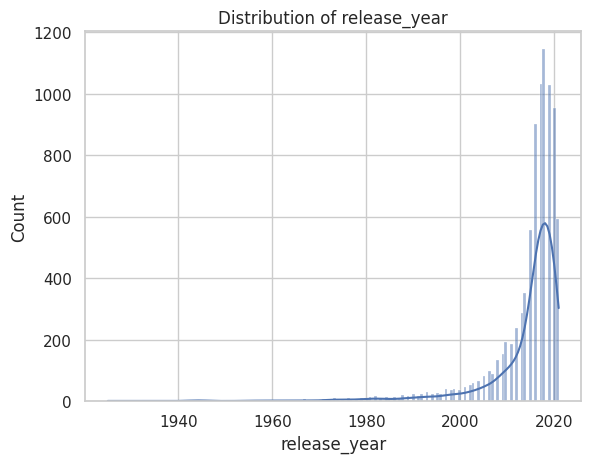

In [ ]:
#Univariate analysis for numerical variables
for var in numerical_vars:
  sns.histplot(df[var].dropna(), kde=True)
  plt.title(f'Distribution of {var}')
  plt.show()

###**Histogram Findings**
`release_year`<br>
- Left-skewed distribution, suggesting that most of the titles are from recent years.
- The mode is likely **2017-2020** which reinforces the earlier summary statistics.
- This could influence Netflix's recommendation strategies, since the algorithm will likely lean into recommending newer releases.

###2. **Boxplot**
- Useful in identifying outliers and understanding the spread and symmetry of the data.


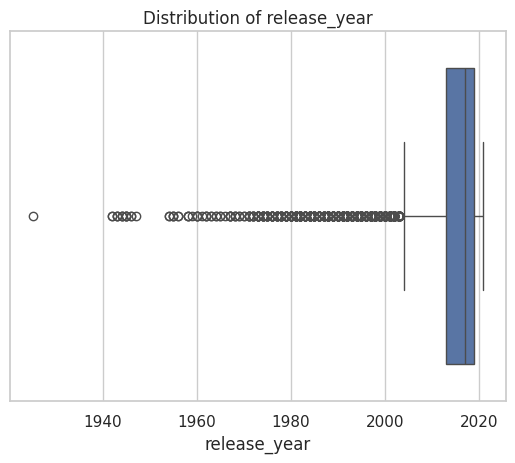

In [ ]:
#Univariate analysis of numerical variables using a boxplot
for var in numerical_vars:
  sns.boxplot(x=df[var].dropna())
  plt.title(f'Distribution of {var}')
  plt.show()

###**Boxplot Findings**
The `release_year`has a significant amount of outliers at the lower end.

####**Boxplot Findings Implications**
The `release_year` column shows extreme skewness. The skew isn't because of outliers, it's because Netflix has way more modern content.<br>
So, instead of transforming, **binning** would be the best action to take since the years can be grouped into eras.




##**Binning Variables Due to High Cardinality**

###**1. Release Year**
####**Bin Descriptions**
- **Classics:** Old-school legends, probably not many but it would be cool to highlight
- **Early 2000s:** The DVD-era stuff
- **Pre-Streaming Boom (2010 - 2015):** Netflix begins dabbling
- **Streaming Surge (2016 - 2018):** Netflix original content takes off
- **COVID Era (2019 - 2021):** Massive spike in streaming


In [ ]:
#Defining the bins and labels
bins = [1990, 1999, 2009, 2015, 2018, 2021]
labels = ['Classics', 'Early 2000s', 'Pre-Streaming Boom', 'Streaming Surge', 'COVID Era']

#Creating a new column
df['era'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=True)

#Checking the new column
df[['release_year', 'era']].head()


,release_year,era
0,2020,COVID Era
1,2021,COVID Era
2,2021,COVID Era
3,2021,COVID Era
4,2021,COVID Era


###**2. Duration**
The duration is tricky to analyze since the minutes (movies) and seasons (shows) are all in the same column, so it will be divided into 2 distinct columns (movie_duration) and (show_duration) to make analysis easier.<br>

The bin labels explained:
- **Short** - 0 - 59 minutes
- **Medium** - 60 - 119 minutes
- **Long** - 120 - 179 minutes
- **Very Long** - 180 - 239 minutes
- **Epic** - 240 - 300 minutes

In [ ]:
#Creating a new column for movie durations in minutes
df['movie_duration'] = df.apply(
    lambda row: float(row['duration'].replace('min', '').strip())
    if row['type'] == 'Movie' and isinstance(row['duration'], str) and 'min' in row['duration']
    else None,
    axis=1
)
#Creating a new column for tv show durations in seasons
df['show_duration'] = df.apply(
    lambda row: float(row['duration'].replace('Seasons', '').replace('Season', '').strip())
    if row['type'] == 'TV Show' and isinstance(row['duration'],str) and 'Season' in row['duration']
    else None,
    axis=1
)

#Parsing show_duration to int
df['show_duration'] = df['show_duration'].dropna().astype('Int64')

df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,era,movie_duration,show_duration
0,Movie,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,COVID Era,90.0,<NA>
1,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",COVID Era,NaN,2
2,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",COVID Era,NaN,1
3,TV Show,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",COVID Era,NaN,1
4,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",COVID Era,NaN,2


In [ ]:
# Define the bins and labels
bins = [0, 60, 120, 180, 240, 300]
labels = ['Short', 'Medium', 'Long', 'Very Long', 'Epic']

# Apply binning only to rows where 'movie_duration' is not NaN
df.loc[df['movie_duration'].notna(), 'movie_duration_category'] = pd.cut(
    df.loc[df['movie_duration'].notna(), 'movie_duration'],
    bins=bins,
    labels=labels,
    right=False
)

##**Converting `date_added` to DateTime**
Since `date_added` is in string format, it would be easier to analyze and draw insights if it was in the DateTime format.<br>

In [ ]:
#Ensuring consistency in date format i.e leading 0 for singular dates
df['date_added'] = df['date_added'].str.replace(r'(\s\d{1})\s', r' 0\1 ', regex=True)

#Converting the date_added column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

In [ ]:
df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,era,movie_duration,show_duration,movie_duration_category
0,Movie,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,COVID Era,90.0,<NA>,Medium
1,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",COVID Era,NaN,2,NaN
2,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",COVID Era,NaN,1,NaN
3,TV Show,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",COVID Era,NaN,1,NaN
4,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",COVID Era,NaN,2,NaN


##**Extracting Year From the date_added Column**

In [ ]:
#Dropping null values in year and converting the datatype to int
df['year_added'] = df['date_added'].dt.year.dropna().astype('Int64')


##**Extracting Month From the date_added Column**

In [ ]:
#Extracting the month added
df['month_added'] = df['date_added'].dt.month_name()

df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,era,movie_duration,show_duration,movie_duration_category,year_added,month_added
0,Movie,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,COVID Era,90.0,<NA>,Medium,2021,September
1,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",COVID Era,NaN,2,NaN,2021,September
2,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",COVID Era,NaN,1,NaN,2021,September
3,TV Show,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",COVID Era,NaN,1,NaN,2021,September
4,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",COVID Era,NaN,2,NaN,2021,September


##**Univariate Analysis of Categorical Variables**
Univariate analysis focuses on examining individual variables within the Netflix dataset, such as content type, genre, release year and country of origin. This helps uncover the distribution of movies and TV Shows, identify the most common genres and highlight trends in content production over time.

###**1. Era**


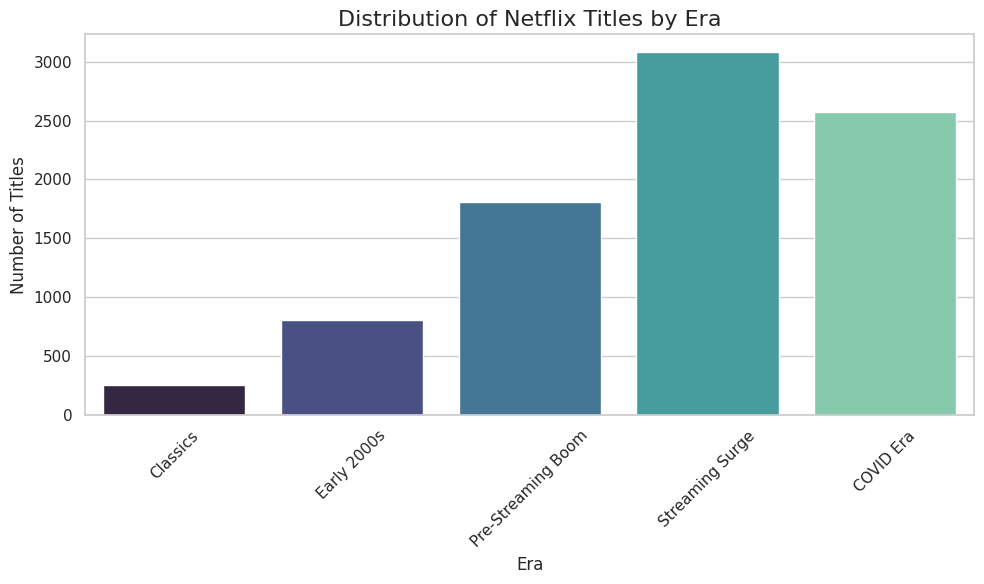

In [ ]:
#Count plot for the eras
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='era', hue='era', palette='mako', legend=False)
plt.title('Distribution of Netflix Titles by Era', fontsize=16)
plt.xlabel('Era', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

###**Findings**
- From the countplot, we see that most of the titles are from the Streaming Surge **(2016-2018)**, followed by the COVID era.
- This trend suggests a strategic expansion by the platform, first to establish dominance with a surge in original content, and later to meet the heightened demand for at-home entertainment during the COVID pandemic.
- In contrast, titles from the *Classics* and *Early 2000s* era are relatively few, highlighting a heavier focus on contemporary rather than archival content.

###**2. Type**

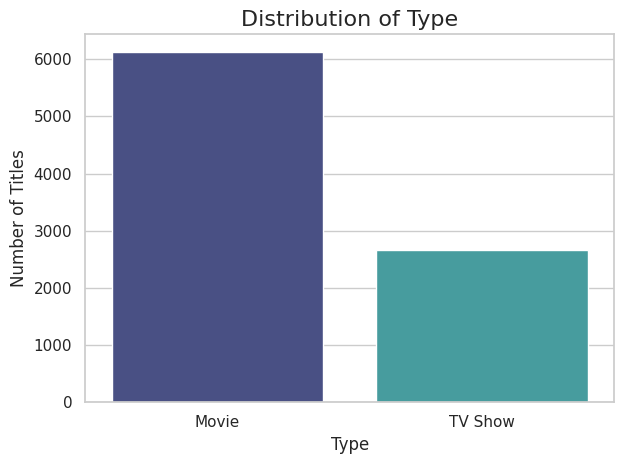

In [ ]:
#Univariate analysis: type
sns.countplot(data=df, x='type', hue='type', palette='mako', order=df['type'].value_counts().index, legend=False)
plt.title('Distribution of Type', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.tight_layout()
plt.show()




###**Findings**
- The countplot reveals a significant skew in favor of movies over TV shows, with nearly three times as many movies in the catalog.
- This suggests a strategic acquisition pattern where standalone, shorter-form content is prioritized. Movies may offer a quicker turnaround for production and a broader global appeal, allowing Netflix to cater to diverse viewer preferences with minimal commitment.
- The dominance of movies could reflect cost-efficiency or a viewer base that leans towards quicker, one-time viewing experiences rather than serialized content. However, this opens a potential gap or opportunity for Netflix to expans its TV Show library for audiences seeking long-form storytelling and character development.

###**3. Movie Duration Category**

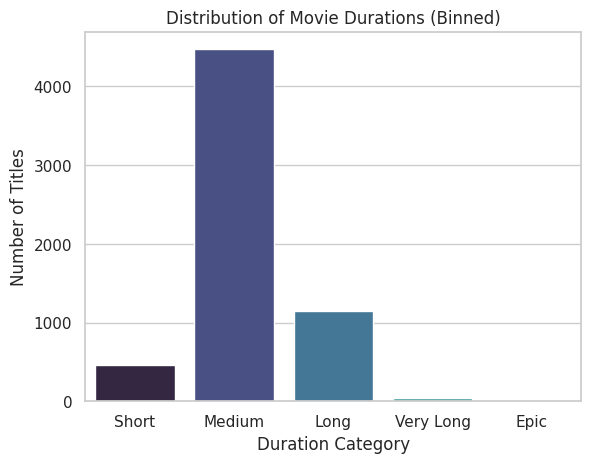

In [ ]:
#Plotting the countplot for the new column
sns.countplot(x='movie_duration_category', hue='movie_duration_category', data=df, palette='mako', legend=False)
plt.title('Distribution of Movie Durations (Binned)')
plt.xlabel('Duration Category')
plt.ylabel('Number of Titles')
plt.show()

###**Findings**
- Most titles fall within the medium-length range (60 - 119 minutes).
- The concentration in this bin suggests that the majority of content is designed to fit typical viewer expectations and attention spans, providing a good narratice experience without being overly short or excessively long.
- The distribution may also reflect industry norms, where films are typically structured within this duration to balance storytelling depth and viewer engagement.

###**4. Show Duration**

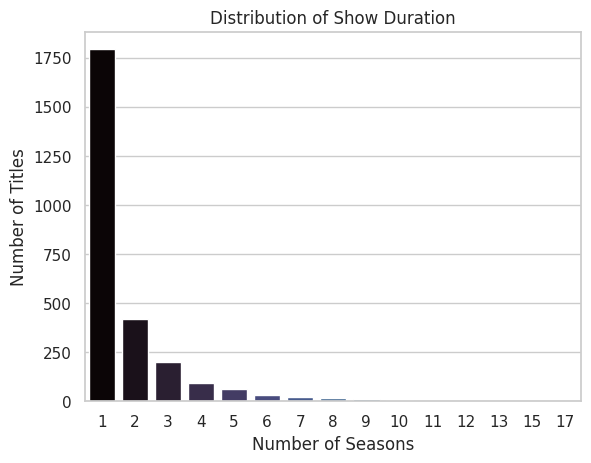

In [ ]:
#Plotting the countplot for the show_duration column
sns.countplot(x='show_duration', hue='show_duration', data=df[df['type'] == 'TV Show'], palette='mako', legend=False)
plt.title('Distribution of Show Duration')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Titles')
# plt.xticks(rotation=45, ha='right')
plt.show()

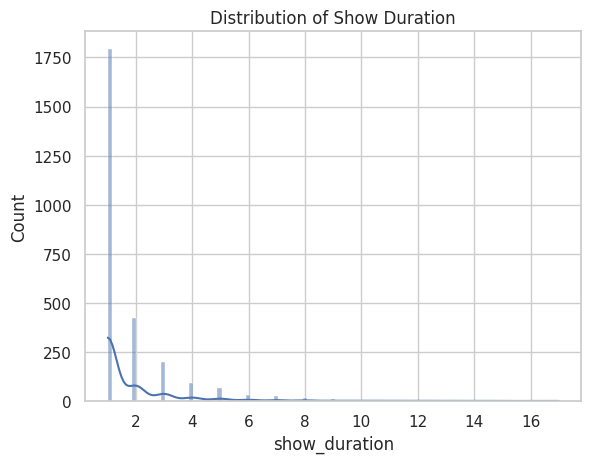

In [ ]:
#Histogram for duration of Seasons
sns.histplot(df['show_duration'].dropna(), kde=True)
plt.title(f'Distribution of Show Duration')
plt.show()

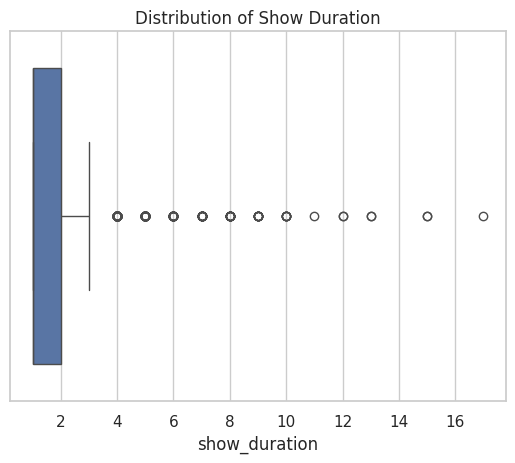

In [ ]:
#Boxplot for show duration
sns.boxplot(x=df['show_duration'].dropna())
plt.title(f'Distribution of Show Duration')
plt.show()

###**Findings**
- An analysis of show durations by number of seasons reveals a right-skewed distribution, with a majority of shows having only one season.
- This trend suggests that a significant portion of the platform's content consists of limited series, short-run productions, or shows that may not have been renewed beyond their initial season.
- The long tail of shows with multiple seasons likely represents a smaller group of successful or legacy titles.
- This insight highlights the platform's apparent focus on variety and turnover, possibly to keep content fresher and cater to evolving viewer interests.

###**5. Year Added**

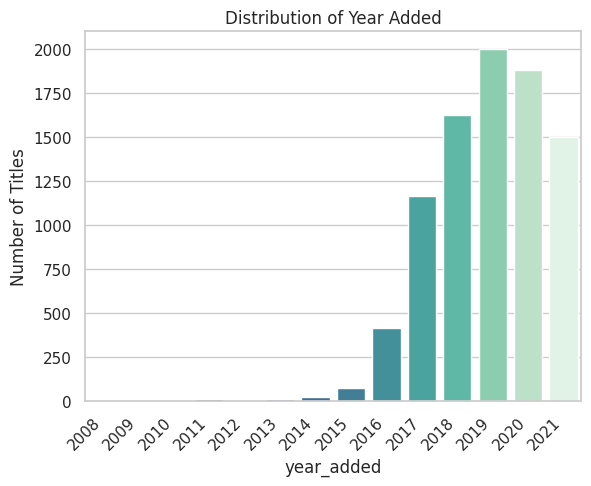

In [ ]:
#Plotting the countplot for the year_added column
sns.countplot(x='year_added', hue='year_added', data=df, palette='mako', legend=False)
plt.title('Distribution of Year Added')
plt.xlabel('year_added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

###**Findings**
- There is a clear upward trend in the number of titles added from 2014 to 2019.
- The most significant growth occurred between 2016 - 2019, suggesting an aggressive content expansion phase, likely reflecting Netflix's strategic investment in original or licensed content.
- The highest number of titles was added in **2019**, peaking at around **2000 titles**. This could indicate Netflix's maturity point in its global expansion or preparation for competition from new streaming services launching in 2020 e.g. Disney+
- There is a noticeable decline in 2020 and 2021, which may have been attributed to production slowdowns due to the COVID-19 pandemic.
- Very few titles were added before 2015, suggesting limited platform activity or catalog growth during Netflix's earlier years.

###**6. Month Added**

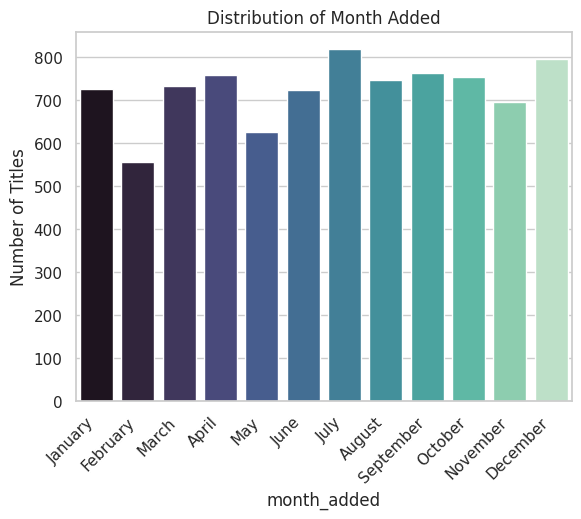

In [ ]:
#Plotting the countplot for the month_added column
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x='month_added', hue='month_added', order=month_order, hue_order=month_order, data=df, palette='mako', legend=False)
plt.title('Distribution of Month Added')
plt.xlabel('month_added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

###**Findings**
- **July** has the highest number of titles added. This could point to a mid-year content refresh strategy possibly to attract viewers.
- **February** has the lowest number of additions. This might be due to its shorter length or fewer strategic content releases planned during this month.
- There is a steady addition across months. The distribution is fairly balanced across the year, suggesting consistent content acquisition or release scheduling.
- There are slight peaks in:
 - **April:** Could be a post-Q1 refresh tied to global content cycles.
 - **September:** Might align with back-to-school periods in some countries
 - **December:** May be influenced by holiday-season content, especially Christmas period.

###**7. Rating**


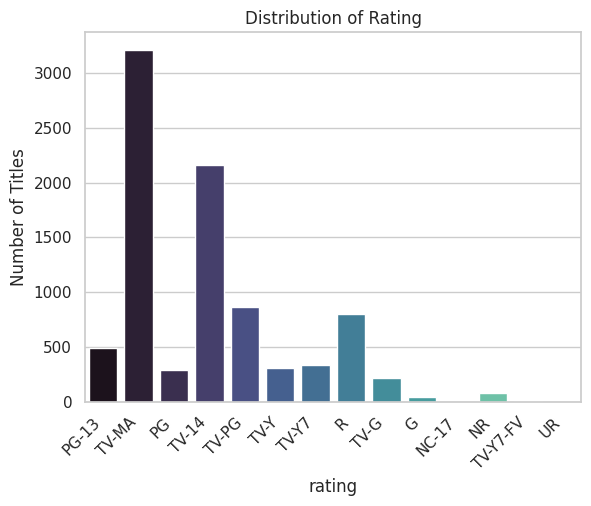

In [ ]:
sns.countplot(x='rating', hue='rating', data=df, palette='mako', legend=False)
plt.title('Distribution of Rating')
plt.xlabel('rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

###**Findings**
- The content rating distribution reveals a strong leaning toward mature audiences on Netflix.
- The majority titles are rated **TV-MA** (Over 3000 titles) and **TV-14** (Over 2000 titles), highlighting a strategic focus on teen and adult-oriented content.
- In contrast, **PG**, **PG-13**, **R** and **TV-PG** rated content are significantly fewer, suggesting a smaller catalogue of traditional, family-friendly films.
- Ratings like **TV-Y**, **TV-47** and **TV-G**, which are geared toward children, make up a much smaller portion of the library.
- Extremely restricted or unrated categories (**NC-17**, **UR**, or **TV-Y7-FV**) are nearly absent.
- This distribution implies the platform's target demographic skews older, aligning with trends in binge-watching, edgier original content, and genre experimentation aimed at young adults and mature viewers.

###**8. Cast**
The `cast` column contains multiple actors and actresses listed per title, making it necessary to first explode this column. This transformation enables a more accurate analysis of individual cast members and their frequency of appearances across different titles.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Anupam Kher'),
  Text(1, 0, 'Shah Rukh Khan'),
  Text(2, 0, 'Julie Tejwani'),
  Text(3, 0, 'Naseeruddin Shah'),
  Text(4, 0, 'Takahiro Sakurai'),
  Text(5, 0, 'Rupa Bhimani'),
  Text(6, 0, 'Akshay Kumar'),
  Text(7, 0, 'Om Puri'),
  Text(8, 0, 'Yuki Kaji'),
  Text(9, 0, 'Amitabh Bachchan'),
  Text(10, 0, 'Paresh Rawal'),
  Text(11, 0, 'Boman Irani'),
  Text(12, 0, 'Vincent Tong'),
  Text(13, 0, 'Rajesh Kava'),
  Text(14, 0, 'Kareena Kapoor'),
  Text(15, 0, 'Andrea Libman'),
  Text(16, 0, 'Samuel L. Jackson'),
  Text(17, 0, 'John Cleese'),
  Text(18, 0, 'Fred Tatasciore'),
  Text(19, 0, 'Tara Strong')])

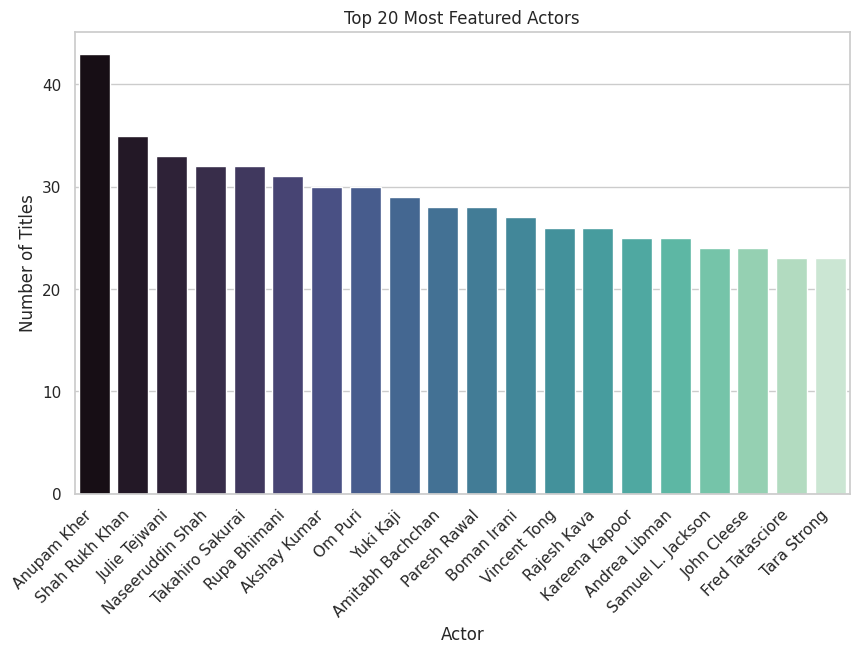

In [ ]:
#Making a copy of the original df
df_exploded_cast = df.copy()

#Filtering out rows where cast is 'Unknown'
df_exploded_cast = df_exploded_cast[df_exploded_cast['cast'].str.strip().str.lower() != 'unknown']

#Splitting 'cast'by comma, handling NaNs
df_exploded_cast['cast'] = df_exploded_cast['cast'].dropna().str.split(', ')

#Exploding cast
cast_exploded = df_exploded_cast.explode('cast')

#Getting the top 10 most frequent cast members
top_20_cast = cast_exploded['cast'].value_counts().head(20)

#Converting the series to a DataFrame for plotting
top_20_cast_df = top_20_cast.reset_index()
top_20_cast_df.columns = ['Actor', 'Number of Titles']

#Creating a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Actor', y='Number of Titles', hue='Actor', data=top_20_cast_df, palette='mako')
plt.title('Top 20 Most Featured Actors')
plt.xticks(rotation=45, ha='right')



###**Findings**
- The bar plot highlights a diverse group of individuals, including iconic figures like Shah Rukh Khan, Amitab Bachchan and Akshay Kumar from Bollywood,as well as promintent Japanese voice actors like Takahiro Sakurai and Yuki Kaji.
- Their frequent appearances suggest high demand, versatility and significant cultural impact.
- Some actors like Anupam Kher, Naseeruddin Shah and Om Puri, known for their long and varied careers, suggest sustained involvement in multiple genres.
- The presence of both Indian and Japanese actors point to a global and culturally diverse media landscape.
- Also, the diverse set of actors suggests the platform contains a wide variety of content from both global cinema and animation/voice acting.

###**9. Director**


The `director` column often contains multiple names listed for a single title, especially in cases of co-directed projects. To perform meaningful analysis of individual directors and their contributions, it is essential to first explode this column. This transformation breaks down multi-director entries into separate rows, allowing for a more precise assessment of each director's frequency of involvement across different titles.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Jan Suter'),
  Text(2, 0, 'Raúl Campos'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Jay Chapman'),
  Text(8, 0, 'Martin Scorsese'),
  Text(9, 0, 'Youssef Chahine'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Don Michael Paul'),
  Text(12, 0, 'Yılmaz Erdoğan'),
  Text(13, 0, 'Anurag Kashyap'),
  Text(14, 0, 'Shannon Hartman'),
  Text(15, 0, 'David Dhawan'),
  Text(16, 0, 'Ryan Polito'),
  Text(17, 0, 'Johnnie To'),
  Text(18, 0, 'Hakan Algül'),
  Text(19, 0, 'Quentin Tarantino')])

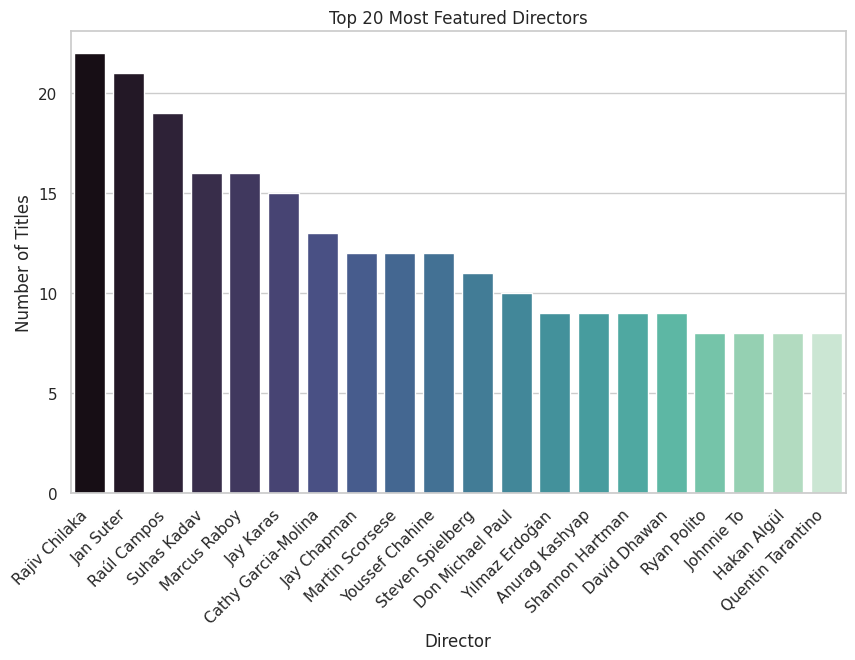

In [ ]:
#Making a copy of the original df
df_exploded_director = df.copy()

#Filtering out rows where director is 'Unknown'
df_exploded_director = df_exploded_director[df_exploded_director['director'].str.strip().str.lower() != 'unknown']

#Splitting 'director'by comma, handling NaNs
df_exploded_director['director'] = df_exploded_director['director'].dropna().str.split(', ')

#Exploding director
director_exploded = df_exploded_director.explode('director')

#Getting the top 20 most frequent director members
top_20_director = director_exploded['director'].value_counts().head(20)

#Converting the series to a DataFrame for plotting
top_20_director_df = top_20_director.reset_index()
top_20_director_df.columns = ['Director', 'Number of Titles']

#Creating a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Director', y='Number of Titles', hue='Director', data=top_20_director_df, palette='mako')
plt.title('Top 20 Most Featured Directors')
plt.xticks(rotation=45, ha='right')

###**Findings**
- The bar chart reveals a mix of high-volume genre specialists and internationally acclaimed filmmakers.
- **Rajiv Chilaka** and **Suhas Kadav**, known for their work in Indian animation, top the list, highlighting the platform's large offering of children's content.
- **Jan Suter** and **Raul Campos**, associated with music documentaries and Latin American content, also rank highlt, indicating regional specialization.
- Directors like **Cathy Garcia-Molina** (Filipino drama), **Marcus Raboy** (comedy/music), and **Martin Scorsese** (auteur cinema) reflect both diversity and prestige in content.
- Overall, the data suggests that the platform balances mass-appeal, high-output productions with globally recognized cinematic works to serve a varied audience.

###**10. Country**
The `country` column often contains multiple countries listed for a single title, particularly in cases of international collaborations or co-productions. To enable accurate analysis of each country's contribution, it is important to first explode this column. This transformation separates entries with multiple countries into individual rows, allowing for a clearer assessment of how each country appears across the dataset.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'China'),
  Text(11, 0, 'Australia'),
  Text(12, 0, 'Egypt'),
  Text(13, 0, 'Turkey'),
  Text(14, 0, 'Hong Kong'),
  Text(15, 0, 'Nigeria'),
  Text(16, 0, 'Italy'),
  Text(17, 0, 'Brazil'),
  Text(18, 0, 'Argentina'),
  Text(19, 0, 'Belgium')])

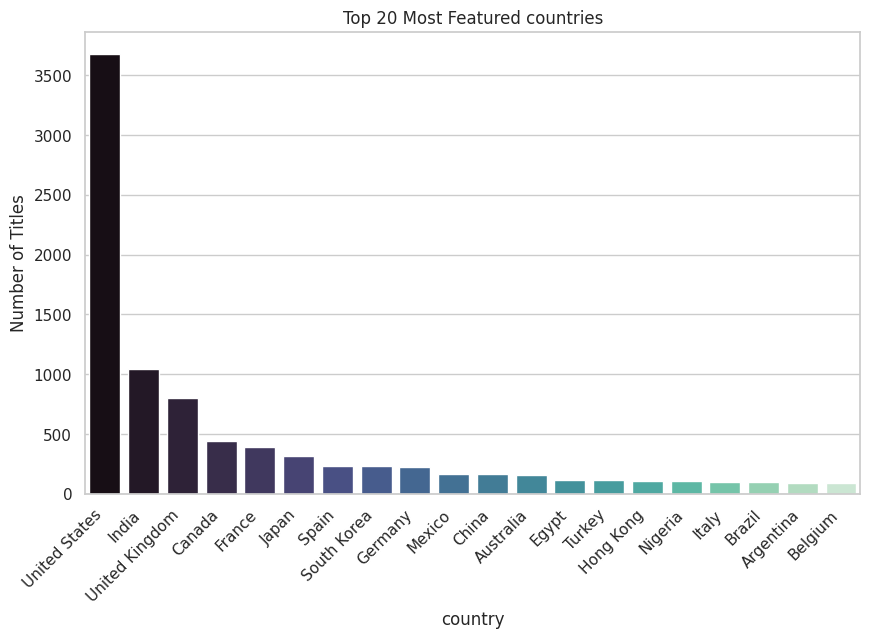

In [ ]:
#Making a copy of the original df
df_exploded_country = df.copy()

#Filtering out rows where country is 'Unknown'
df_exploded_country = df_exploded_country[df_exploded_country['country'].str.strip().str.lower() != 'unknown']

#Splitting 'country'by comma, handling NaNs
df_exploded_country['country'] = df_exploded_country['country'].dropna().str.split(', ')

#Exploding country
country_exploded = df_exploded_country.explode('country')

#Getting the top 20 most frequent country members
top_20_country = country_exploded['country'].value_counts().head(20)

#Converting the series to a DataFrame for plotting
top_20_country_df = top_20_country.reset_index()
top_20_country_df.columns = ['country', 'Number of Titles']

#Creating a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='country', y='Number of Titles', hue='country', data=top_20_country_df, palette='mako')
plt.title('Top 20 Most Featured countries')
plt.xticks(rotation=45, ha='right')

###**Findings**
- The bar plot reveals a significant dominance by **the United States** in terms of content production or availabilty, with a count that far exceeds all other countries.
- **India** and **the United Kingdom** follow, though at a much lower scale, indicating strong regional production industres, particularly in Bollywood and British cinema.
- The presence of countries like **Canada**, **France**, **Japan** and **South Korea** suggests a diverse global contribution to the content catalog, while **Spain**, **Germany** and **Mexico** round out the top 10, reflecting notable inputs from European and Latin American markets.
- This distribution highlights the global nature of the platform's library but also underscores the concentration of content originating from a few dominant regions.

###**11. Listed In (Genre)**
The `listed_in` column, which represents the genres associated with each title, often includes multiple genres per entry. To gain meaningful insights into the popularity and distribution of individual genres, it is necessary to explode this column. Doing so breaks down multi-genre listing into separate rows, providing a more detailed and precise analysis of how frequently each genre appears in the dataset.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies'),
  Text(10, 0, 'Thrillers'),
  Text(11, 0, 'TV Comedies'),
  Text(12, 0, 'Crime TV Shows'),
  Text(13, 0, "Kids' TV"),
  Text(14, 0, 'Docuseries'),
  Text(15, 0, 'Music & Musicals'),
  Text(16, 0, 'Romantic TV Shows'),
  Text(17, 0, 'Horror Movies'),
  Text(18, 0, 'Stand-Up Comedy'),
  Text(19, 0, 'Reality TV')])

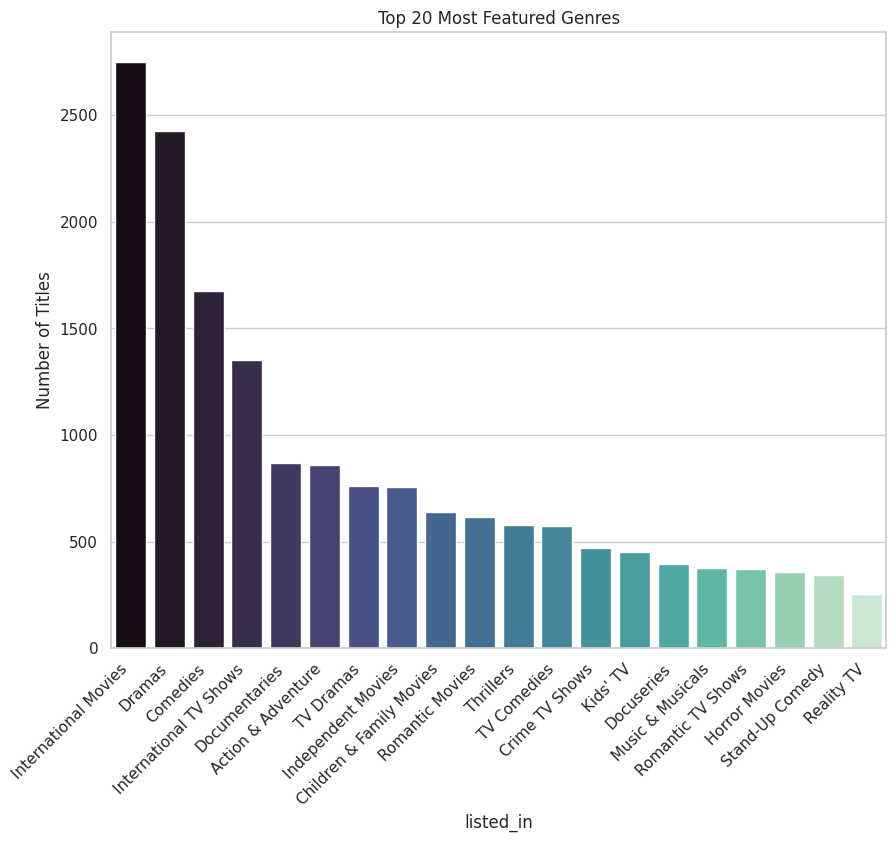

In [ ]:
#Making a copy of the original df
df_exploded_listed_in = df.copy()

#Filtering out rows where listed_in is 'Unknown'
df_exploded_listed_in = df_exploded_listed_in[df_exploded_listed_in['listed_in'].str.strip().str.lower() != 'unknown']

#Splitting 'listed_in'by comma, handling NaNs
df_exploded_listed_in['listed_in'] = df_exploded_listed_in['listed_in'].dropna().str.split(', ')

#Exploding listed_in
listed_in_exploded = df_exploded_listed_in.explode('listed_in')

#Getting the top 20 most frequent listed_in members
top_20_listed_in = listed_in_exploded['listed_in'].value_counts().head(20)

#Converting the series to a DataFrame for plotting
top_20_listed_in_df = top_20_listed_in.reset_index()
top_20_listed_in_df.columns = ['listed_in', 'Number of Titles']

#Creating a bar plot
plt.figure(figsize=(10,8))
sns.barplot(x='listed_in', y='Number of Titles', hue='listed_in', data=top_20_listed_in_df, palette='mako')
plt.title('Top 20 Most Featured Genres')
plt.xticks(rotation=45, ha='right')

###**Findings**
The plot of the most featured genres reveals that **International Movies** are the most prominent, reflecting the platform's global content strategy. **Dramas** and **Comedies** follow closely, suggesting these genres have a broad viewer appeal. The strong presence of **International TV Shows**, **Documentaries**, and **Action & Adventure** content indicates a well-rounded catalog catering to diverse tastes. Additionally, genres lke **TV Dramas**, **Independent Movies**, **Children & Family Movies** and **Romantic Movies** round out the top 10, highlighting consistent demand for both mainstream and niche storytelling formats.

#**Bivariate Analysis**
Bivariate analysis explores the relationships between two variables to uncover patterns or associations. In this dataset, for example, it helps reveal how content types (Movies vs TV Shows) vary across different genres, countries or release years, providing deeper insights into Netflix's content distribution and audience targeting strategies.

##**1. Content & Metadata📽**

###**i) Type vs Genre**
By comparing the frequency of each genre across both content types, we can identify genre preferences or trends based on format. For instance, some genres like *Dramas*, *Comedies*, or *Romantic Movies* may be more prominent in movies, while others like *TV Dramas* or *International TV Shows* are likely to dominate the TV show category. Understanding this distribution helps highlight how content is structured and targeted depending on the format, and may reflect production styles, audience expectations, or platform strategies.


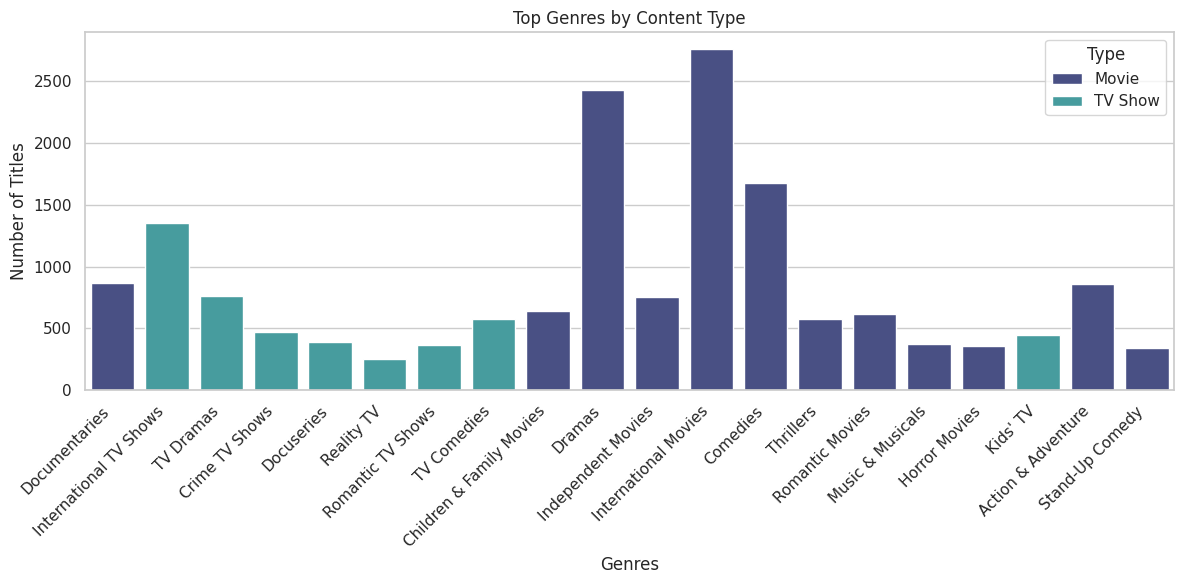

In [ ]:
#Getting the top 20 genres
top_genres = listed_in_exploded['listed_in'].value_counts().nlargest(20).index

#Filtering the DataFrame to only include those top genres
filtered_genre_df = listed_in_exploded[listed_in_exploded['listed_in'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.countplot(
    x='listed_in',
    hue='type',
    data=filtered_genre_df,
    palette='mako'
)
plt.title('Top Genres by Content Type')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###**Findings**
- Movies are more dominant in genres like Action, Romance, Thriller and Horror

###**ii) Genre vs Movie Duration**
This analysis explores how the typical length of content varies across different genres. By examining average durations, this analysis helps identify which genres tend to feature shorter or longer content, such as short-format comedies vs lengthy dramas. <br>
This insight provides an understanding of genre-specific trends in content length on Netflix, which may reflect viewer preferences and platform strategy.

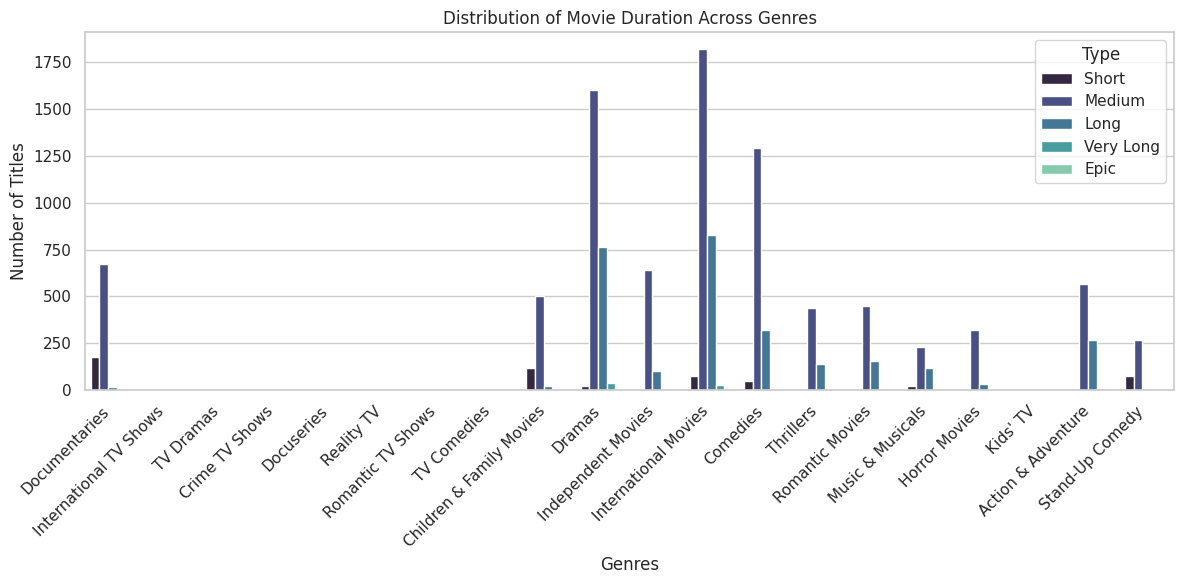

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    x='listed_in',
    hue='movie_duration_category',
    data=filtered_genre_df,
    palette='mako'
)
plt.title('Distribution of Movie Duration Across Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###**Findings**

###**iii) Genre vs Show Duration**


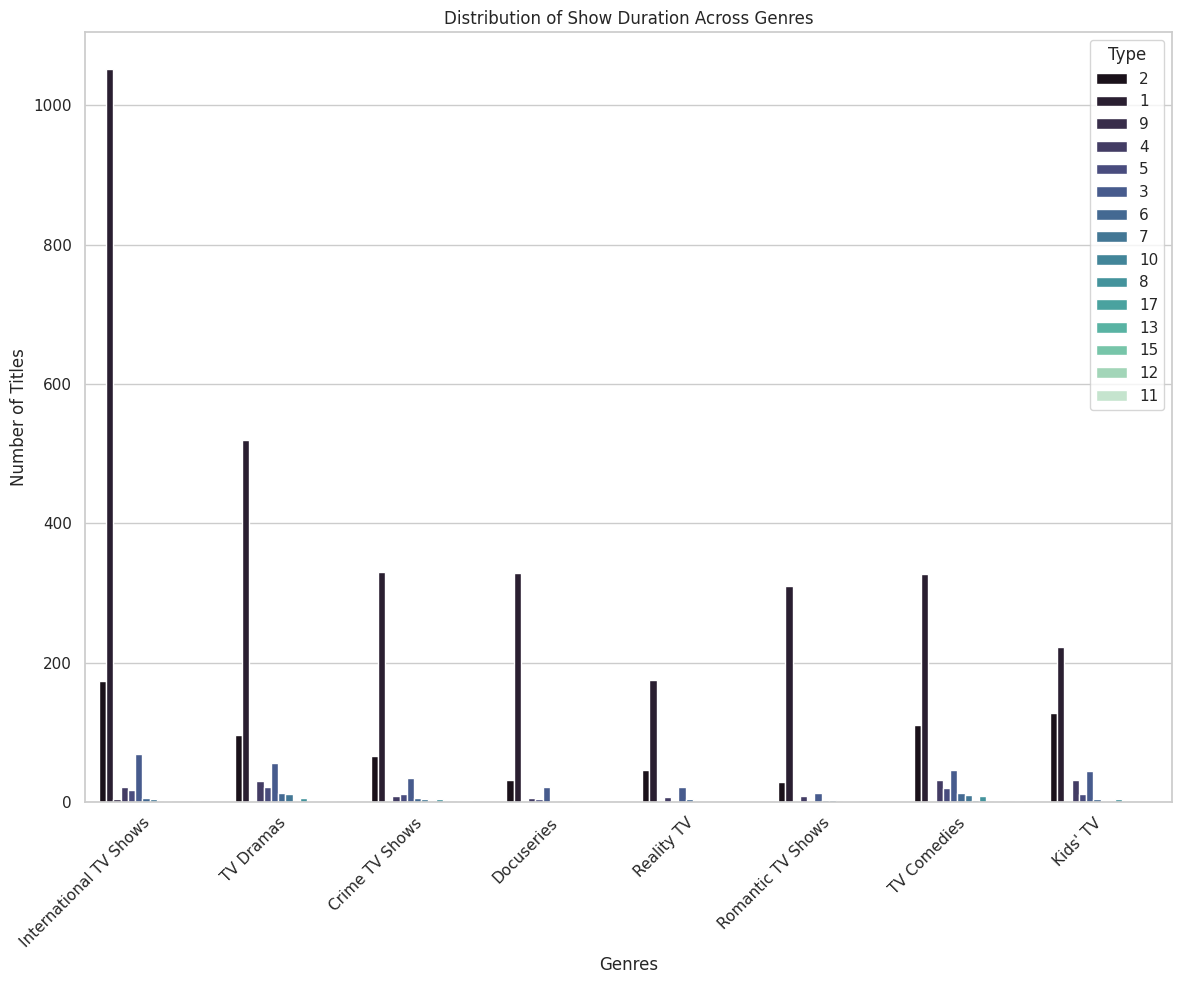

In [ ]:
tv_show_df = filtered_genre_df.copy()
tv_show_df = tv_show_df.dropna(subset=['show_duration'])
tv_show_df['show_duration'] = tv_show_df['show_duration'].astype(str)
plt.figure(figsize=(12,10))
sns.countplot(
    x='listed_in',
    hue='show_duration',
    data=tv_show_df,
    palette='mako'
)
plt.title('Distribution of Show Duration Across Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##**Geographic Focus 🌍**
###**i) Country vs Genre**
This analysis explores the relationship between the production country and the genres most commonly associated with each. By breaking down multi-country and multi-genre entries into separate rows, we can more accurately identify trends in genre preferences across different regions.<br>
For example, certain countries may favor genres like dramas and documentaries, while others produce a higher number of comedies or action titles. This comparison reveals cultural and industry-specific tendencies in content creation, offering insights into how geographic context influences genre popularity on the platform.


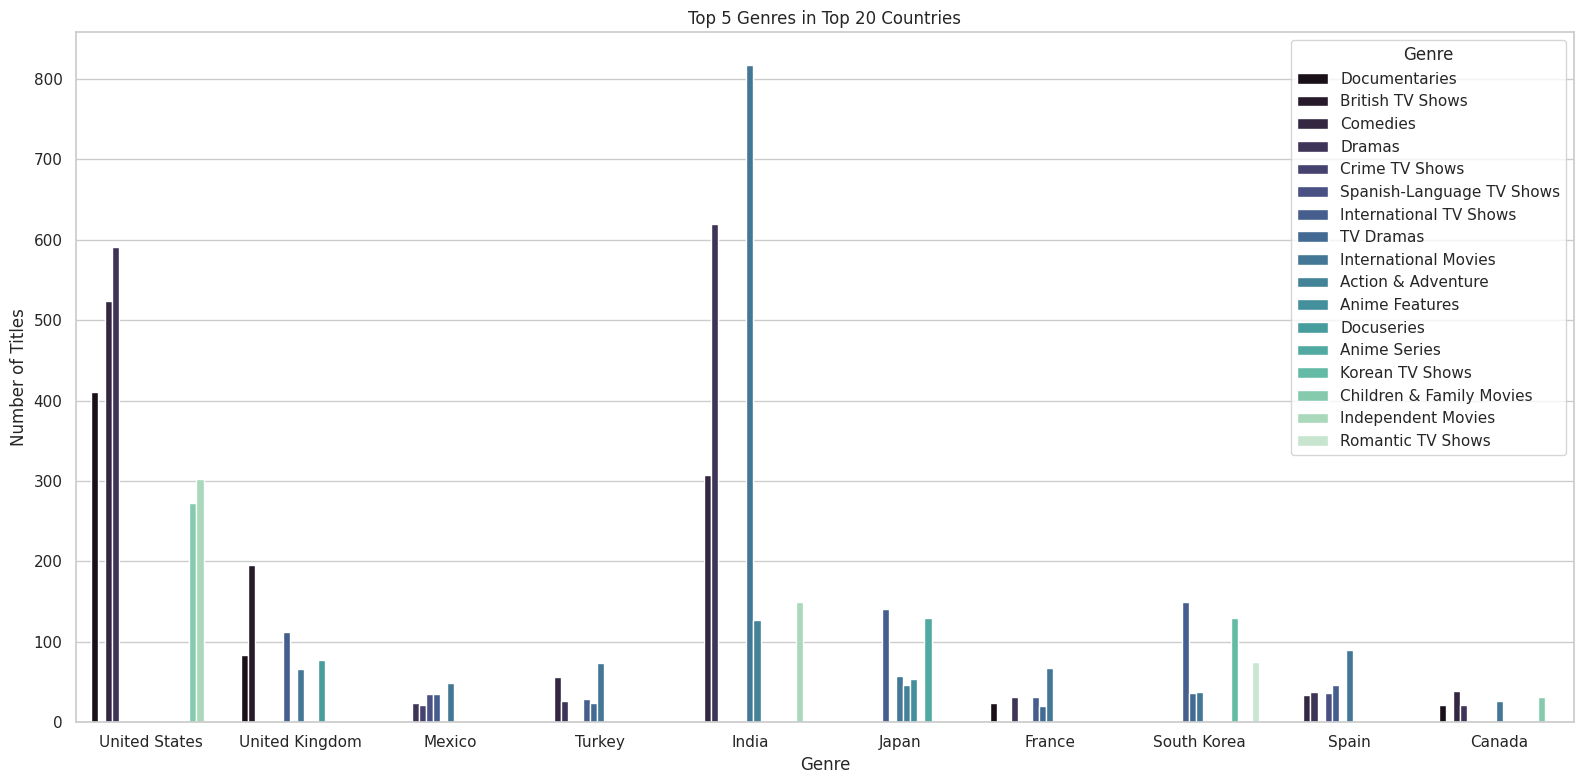

In [ ]:
#Filtering the DataFrame to only include those top countries
filtered_country_df = listed_in_exploded[listed_in_exploded['country'].str.strip().str.lower()!= 'unknown']

#Getting the top 10 countries
top_countries = filtered_country_df['country'].value_counts().nlargest(10).index

#Filtering the DataFrame to only include rows from the top 10 countries
filtered_country_df = filtered_country_df[filtered_country_df['country'].isin(top_countries)]

#Creating a new DataFrame that gets top 5 genres per country
top_genres_per_country = (
    filtered_country_df.groupby(['country', 'listed_in'])
    .size()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
)

#Keeping only the top 5 genres per country
top_5_genres = (
    top_genres_per_country
    .groupby('country')
    .head(5)
)

#Filtering the original filtered_country_df using these top 5 genres per country
final_country_df = filtered_country_df.merge(top_5_genres[['country', 'listed_in']], on=['country', 'listed_in'])

#Grouped barplot showing top genres per country
plt.figure(figsize=(16,8))
sns.countplot(
    x='country',
    hue='listed_in',
    data=final_country_df,
    palette='mako'
)
plt.title('Top 5 Genres in Top 20 Countries')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', loc='upper right')
plt.tight_layout()
plt.show()

###**ii) Country vs Type**
By examining the distribution of content types across the top-producing countries, we can identify regional preferences or production strengths. For instance, some countries like the United States and India may have a higher proportion of movies due to their robust film industries, while others might contribute more TV Shows, reflecting a focus on serialized content. <br>
This analysis helps highlight how content offerings vary geographically and can inform strategies around localized content curation and viewer targeting.

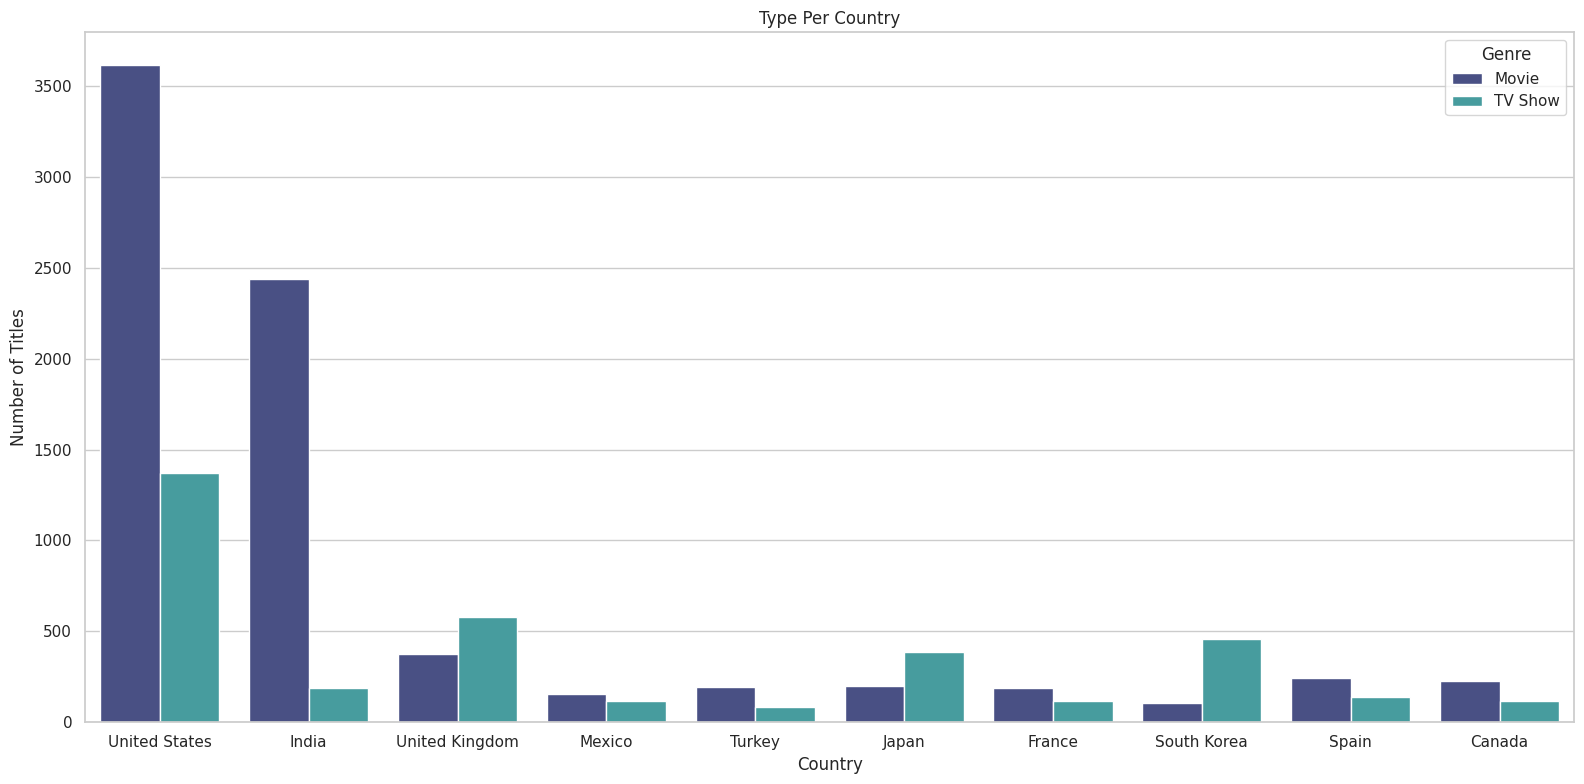

In [ ]:

#Grouped barplot showing top genres per country
plt.figure(figsize=(16,8))
sns.countplot(
    x='country',
    hue='type',
    data=filtered_country_df,
    palette='mako'
)
plt.title('Type Per Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', loc='upper right')
plt.tight_layout()
plt.show()

##**Temporal Trends⌛**
###**i) Era vs Type**


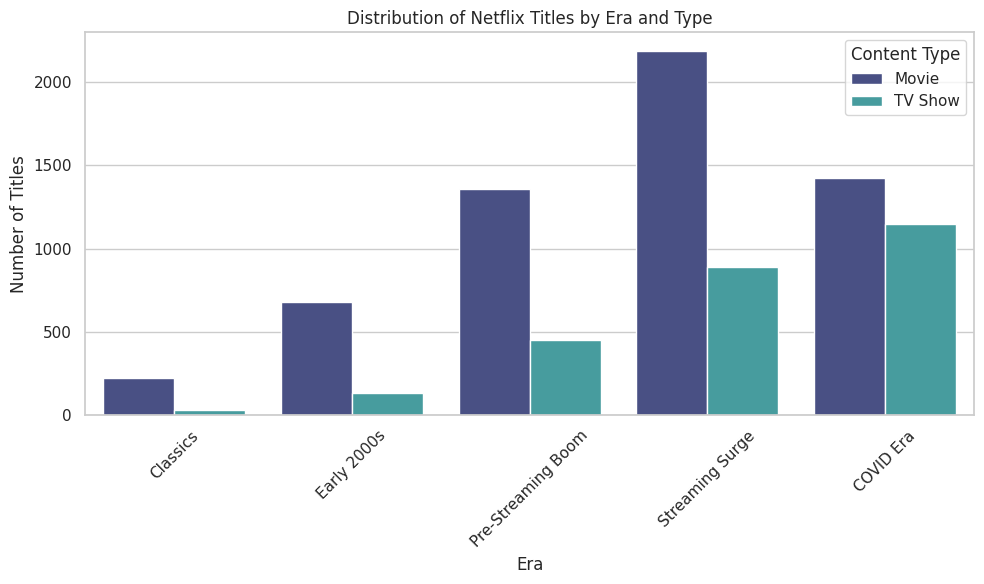

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='era',
    hue='type',
    data=df,
    palette='mako'
)
plt.title('Distribution of Netflix Titles by Era and Type')
plt.xlabel('Era')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

###**ii) Era vs Rating**


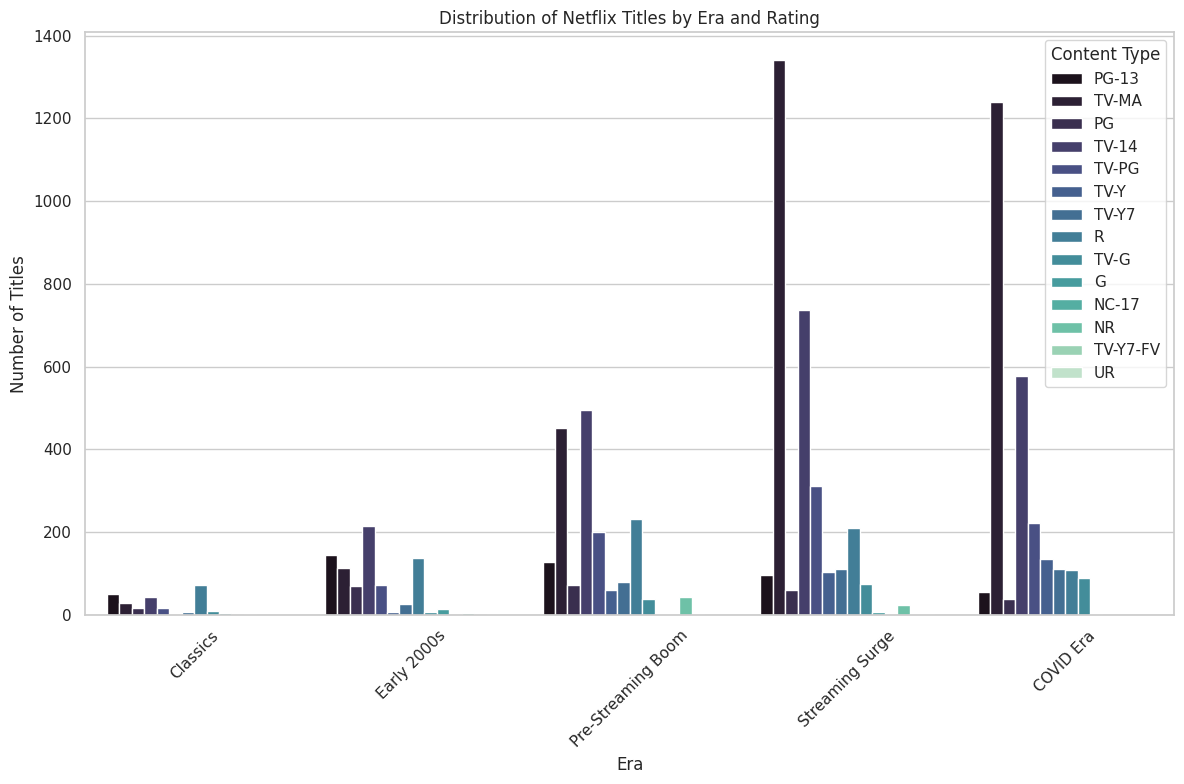

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(
    x='era',
    hue='rating',
    data=df,
    palette='mako'
)
plt.title('Distribution of Netflix Titles by Era and Rating')
plt.xlabel('Era')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

###**iii) Era vs Country**

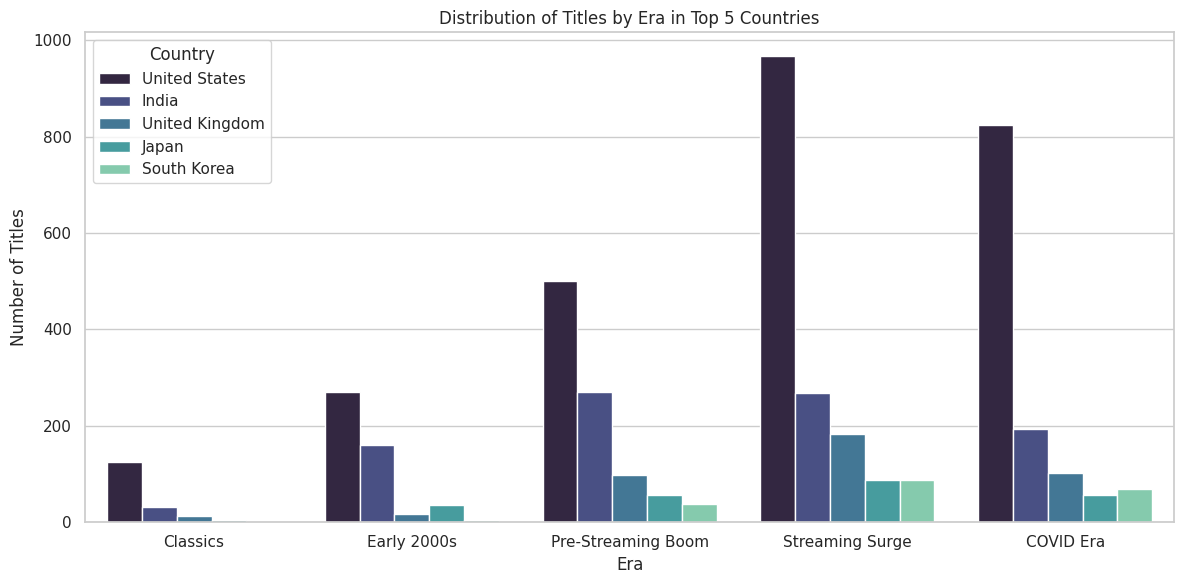

In [ ]:
# Removing rows with 'Unknown' or missing countries
df_country_clean = df[df['country'].notna() & (df['country'].str.strip().str.lower() != 'unknown')]

# Getting top 5 countries
top_5_countries = df_country_clean['country'].value_counts().nlargest(5).index

# Filtering DataFrame to only include those countries
df_top5_countries = df_country_clean[df_country_clean['country'].isin(top_5_countries)]

# Plotting Era vs Top 5 Countries
plt.figure(figsize=(12,6))
sns.countplot(
    x='era',
    hue='country',
    data=df_top5_countries,
    palette='mako'
)
plt.title('Distribution of Titles by Era in Top 5 Countries')
plt.xlabel('Era')
plt.ylabel('Number of Titles')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


##**Audience & Ratings🔞**
###**i) Rating vs Genre**

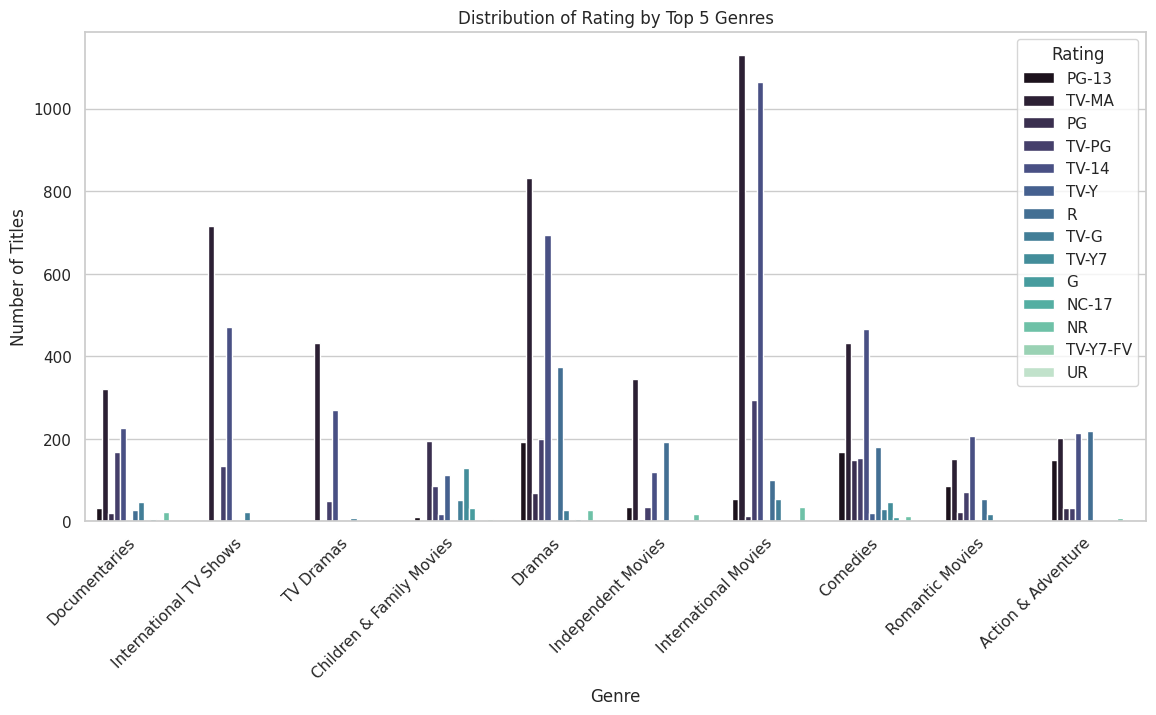

In [ ]:
#Getting the top 10 genres
top_10_genres = listed_in_exploded['listed_in'].value_counts().nlargest(10).index

#Filtering the DataFrame to only include those top genres
genre_rating_df = listed_in_exploded[listed_in_exploded['listed_in'].isin(top_10_genres)]

# Plotting rating vs genre
plt.figure(figsize=(12,6))
sns.countplot(
    x='listed_in',
    hue='rating',
    data=genre_rating_df,
    palette='mako'
)
plt.title('Distribution of Rating by Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()



# **Multivariate Analysis**
- Multivariate Analysis involves examining the relationships among three or more variables simultaneously.
- Helps to understand how variables interact with each other and their combined effect on the target variable.
- Essential for identifying patterns and relationships that may not be evident in univariate or bivariate analyses.

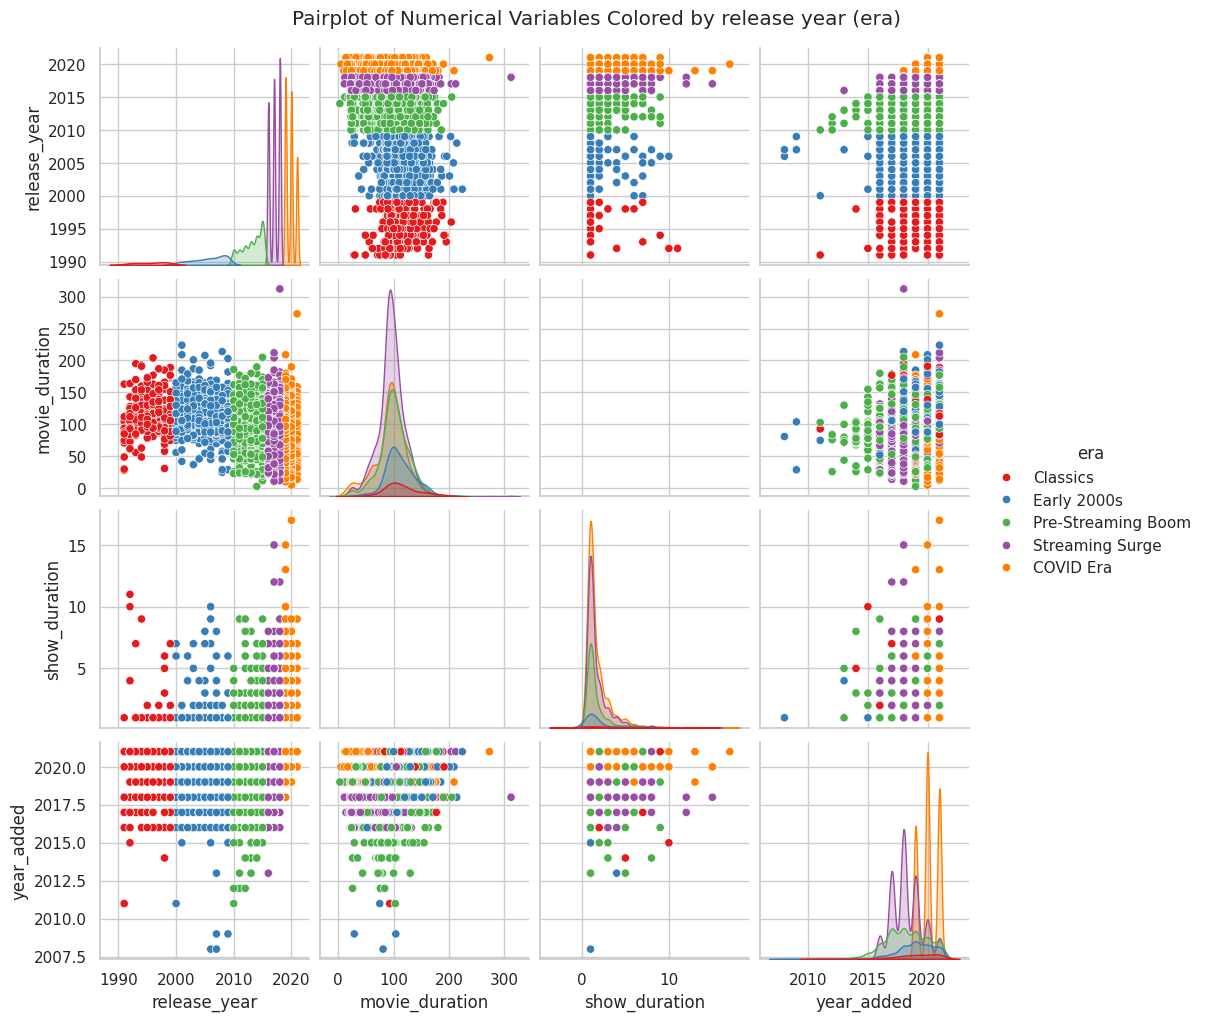

In [ ]:
sns.pairplot(df, hue='era', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables Colored by release year (era)', y=1.02)
plt.show()